# Case Study 1: Tuning the maximum active power production of the PV inverter
Inputs:

Measurements: 
- Active power at PCC (W): $P_{PCC}$
-  Active power production at PV (W):  $P_{PV}$

Parameters:
- Maximum active power injection allowed in the grid (W):  $P_{grid}^{max}$
- Nominal power of the PV inverter (W): $P_{inv}^{nom}$

Output:
- Maximum active power command for PV inverter (W):  $P_{inv}^{max}$ 

Objective: optimize $P_{PV}$ while $P_{PCC} <= P_{grid}^{max}$



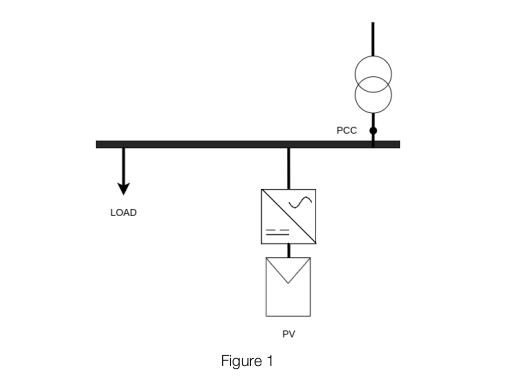

In [13]:
from IPython.display import Image
Image("../documents/cs_1_sld.png")

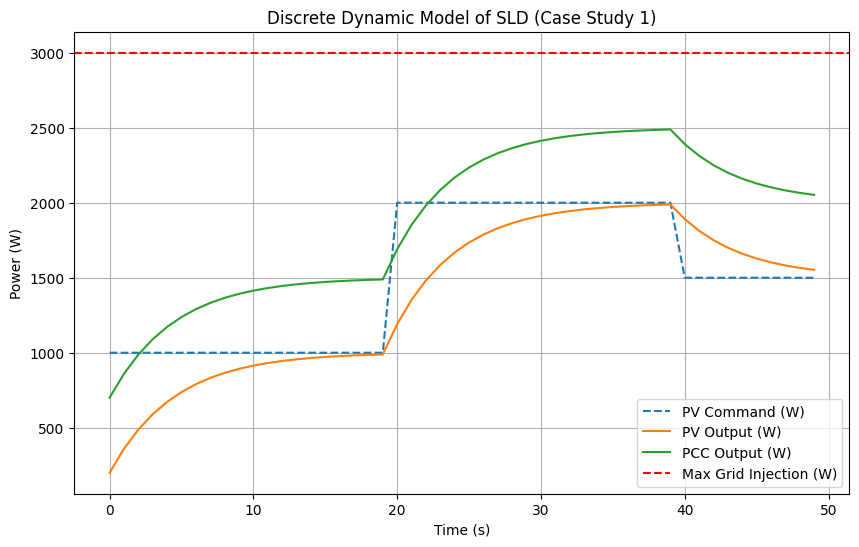

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_sld_discrete(time_steps, delta_t, tau, pv_command, disturbance):
    """
    Simulates the discrete dynamic model for the simplified SLD.

    Parameters:
        time_steps (int): Number of time steps to simulate.
        delta_t (float): Sampling time (seconds).
        tau (float): Time constant of the PV inverter (seconds).
        pv_command (list): List of PV power commands over time (W).
        disturbance (list): List of disturbances at the PCC over time (W).

    Returns:
        tuple: Lists of PV power output and PCC power over time.
    """
    # Calculate alpha
    alpha = delta_t / tau

    # Initialize variables
    pv_output = [0]  # Initial PV power output (W)
    pcc_output = []  # PCC power output

    # Simulate dynamics
    for k in range(time_steps):
        # Get current command and disturbance
        pv_cmd_k = pv_command[k]
        disturbance_k = disturbance[k]

        # Update PV power using discrete dynamic equation
        pv_next = (1 - alpha) * pv_output[-1] + alpha * pv_cmd_k
        pv_output.append(pv_next)

        # Calculate PCC power
        pcc_k = pv_next + disturbance_k
        pcc_output.append(pcc_k)

    # Remove the initial state for plotting
    return pv_output[1:], pcc_output


# Simulation parameters
time_steps = 50
delta_t = 1.0  # Sampling time (s)
tau = 5.0  # PV inverter time constant (s)
pv_command = [1000] * 20 + [2000] * 20 + [1500] * 10  # PV power command (W)
disturbance = [500] * time_steps  # Constant disturbance (W)

# Run the simulation
pv_output, pcc_output = simulate_sld_discrete(time_steps, delta_t, tau, pv_command, disturbance)

# Plot results
time = np.arange(0, time_steps * delta_t, delta_t)
plt.figure(figsize=(10, 6))
plt.plot(time, pv_command, label="PV Command (W)", linestyle="--")
plt.plot(time, pv_output, label="PV Output (W)")
plt.plot(time, pcc_output, label="PCC Output (W)")
plt.axhline(3000, color="red", linestyle="--", label="Max Grid Injection (W)")
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.title("Discrete Dynamic Model of SLD (Case Study 1)")
plt.legend()
plt.grid()
plt.show()


-100
-100
-100
-100
450.0
450.0
750.0
750.0
650.0
650.0
337.5
337.5
43.75
43.75
-109.375
-109.375
-123.4375
-123.4375
-64.84375
-64.84375
-1.171875
-1.171875
32.2265625
32.2265625
33.30078125
33.30078125
17.431640625
17.431640625
0.9033203125
0.9033203125
-7.75146484375
-7.75146484375
-8.172607421875
-8.172607421875
-4.2816162109375
-4.2816162109375
-0.18768310546875
-0.18768310546875
1.956939697265625
1.956939697265625
2.0526885986328125
2.0526885986328125
1.0751724243164062
1.0751724243164062
0.049304962158203125
0.049304962158203125
-0.48804283142089844
-0.48804283142089844
-0.5125761032104492
-0.5125761032104492
-0.2684950828552246
-0.2684950828552246
-0.012177228927612305
-0.012177228927612305
0.12208521366119385
0.12208521366119385
0.12818127870559692
0.12818127870559692
0.06714239716529846
0.06714239716529846
0.003053620457649231
0.003053620457649231
-0.030516646802425385
-0.030516646802425385
-0.03204299136996269
-0.03204299136996269
-0.016784435138106346
-0.016784435138106346


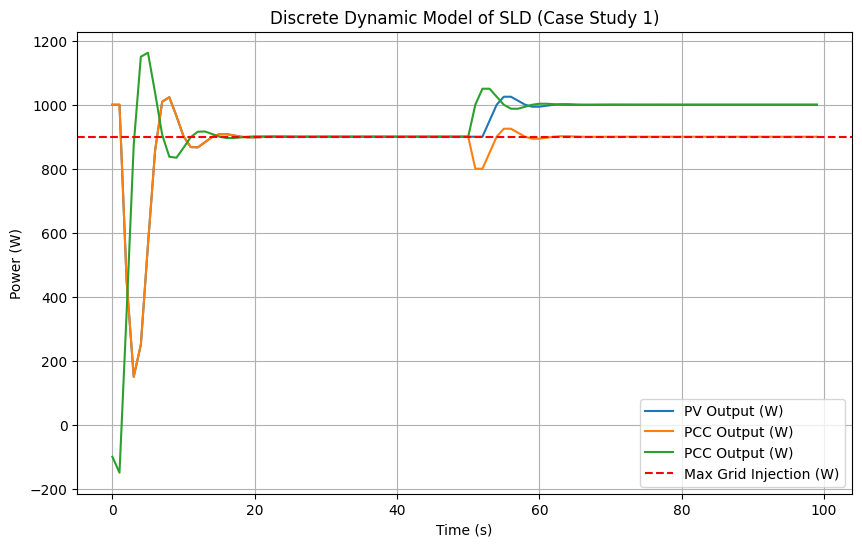

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class PIController:
    def __init__(self, kp, ki):
        self.kp = kp
        self.ki = ki
        self.integral = 0
        self.delta_t = 1

    def update_control_action(self, setpoint, measured_value):
        # Update integral term
        error = setpoint - measured_value
        print(error)
        self.integral += error*self.delta_t 
        # Return PI action
        return self.kp * error + self.ki * self.integral
    

    def set_kp(self, kp):
        self.kp = kp
    
    def set_ki(self, ki):
        self.ki = ki

    def reset(self):
        self.integral = 0

class Inverter:
    def __init__(self, nominal_power):
        self.pv_output_old = nominal_power
        self.pv_power = nominal_power
        self.alpha = 0.5
        self.delta_t = 1
    
    def set_dynamic_model(self, delta_t,tau):
        self.delta_t = delta_t
        self.alpha = delta_t / tau



    def simulate_sld_discrete(self, pv_cmd_k):
        """
        Simulates the discrete dynamic model for the simplified SLD.

        Parameters:
            time_steps (int): Number of time steps to simulate.
            delta_t (float): Sampling time (seconds).
            tau (float): Time constant of the PV inverter (seconds).
            pv_command (list): List of PV power commands over time (W).
            disturbance (list): List of disturbances at the PCC over time (W).

        Returns:
            tuple: Lists of PV power output and PCC power over time.
        """


        # Update PV power using discrete dynamic equation
        pv_next = (1 - self.alpha) * self.pv_output_old + self.alpha * pv_cmd_k

        # Calculate PCC power
        pv_output= self.pv_output_old
        self.pv_output_old= pv_next

        # Remove the initial state for plotting
        return pv_output



def calculate_max_pv_power(pcc_power, pv_power, max_grid_injection, nominal_pv_power):
    """
    Calculate the maximum active power command for the PV inverter.

    Parameters:
        pcc_power (float): Active power at the point of common coupling (W).
        pv_power (float): Active power production of the PV inverter (W).
        max_grid_injection (float): Maximum allowed active power injection into the grid (W).
        nominal_pv_power (float): Nominal power of the PV inverter (W).

    Returns:
        float: Maximum active power command for the PV inverter (W).
    """

    # Initialize PI controller
    pi_controller = PIController(0.5, 0.5, max_grid_injection)
    inverter_pv = Inverter(nominal_pv_power)
    # Initialize allowable PV power
    allowable_pv_power = nominal_pv_power

    if pv_power < nominal_pv_power:
        allowable_pv_power = min(nominal_pv_power, max_grid_injection)

    else:
        allowable_pv_power = allowable_pv_power + pi_controller.update_control_action(pcc_power)


    return allowable_pv_power


def simulate_case_study_1(max_grid_injection=1000, nominal_pv_power=1000, dt=1, steps=100):
    """
    Simulate PI control for Case Study 1.

    Parameters:
        pcc_power (float): Initial PCC power (W). 
        pv_output (float): Initial PV inverter power (W).
        max_grid_injection (float): Maximum allowed grid injection (W).
        nominal_pv_power (float): Nominal PV power (W).
        kp (float): Proportional gain for PI controller.
        ki (float): Integral gain for PI controller.
        dt (float): Time step for simulation (s).
        steps (int): Number of simulation steps.

    Returns:
        list: Time-series data of PCC power and PV commands.
    """

    # Initialize PI controller
    pi_controller = PIController(0.5, 0.5)
    inverter_pv = Inverter(nominal_pv_power)

    # Simulation parameters
    time_steps = steps
    disturbance = [0] * 50 + [-100] * 50  # Constant disturbance (W)

    # Initialize variables
    pv_output = [nominal_pv_power]  # Initial PV power output (W)
    pcc_output = [nominal_pv_power]  # PCC power output
    pv_command=[]


    for k in range(steps):
        print(max_grid_injection-pcc_output[-1])
        pv_command.append(pi_controller.update_control_action(max_grid_injection,pcc_output[-1]))
        pv_output.append(inverter_pv.simulate_sld_discrete(pv_command[-1]))
        pcc_output.append(disturbance[k]+pv_output[-1])


    return pv_output, pcc_output,pv_command

# Simulation parameters
time_steps = 100
delta_t = 1.0  # Sampling time (s)
max_grid_injection=900

# Run the simulation
pv_output, pcc_output, pv_command = simulate_case_study_1(max_grid_injection=max_grid_injection)

# Plot results
time = np.arange(0, time_steps * delta_t, delta_t)
plt.figure(figsize=(10, 6))
plt.plot(time, pv_output[:-1], label="PV Output (W)")
plt.plot(time, pcc_output[:-1], label="PCC Output (W)")
plt.plot(time, pv_command[:], label="PCC Output (W)")
plt.axhline(max_grid_injection, color="red", linestyle="--", label="Max Grid Injection (W)")
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.title("Discrete Dynamic Model of SLD (Case Study 1)")
plt.legend()
plt.grid()
plt.show()

-100
-100
-100
-100
-70.0
-70.0
-40.0
-40.0
-19.0
-19.0
-7.0
-7.0
-1.2999999999999545
-1.2999999999999545
0.7999999999999545
0.7999999999999545
1.1899999999999409
1.1899999999999409
0.9500000000000455
0.9500000000000455
0.5930000000000746
0.5930000000000746
0.3079999999999927
0.3079999999999927
0.13009999999997035
0.13009999999997035
0.03769999999997253
0.03769999999997253
-0.001330000000052678
-0.001330000000052678
-0.01264000000003307
-0.01264000000003307
-0.012241000000017266
-0.012241000000017266
-0.008448999999927764
-0.008448999999927764
-0.004776699999865741
-0.004776699999865741
-0.002241999999910149
-0.002241999999910149
-0.0008089899999959016
-0.0008089899999959016
-0.00013639000007970026
-0.00013639000007970026
0.00010630699989633285
0.00010630699989633285
0.0001472239998747682
0.0001472239998747682
0.00011533189990586834
0.00011533189990586834
7.116469998891262e-05
7.116469998891262e-05
3.6565130017152114e-05
3.6565130017152114e-05
1.521572005458438e-05
1.521572005458438e-0

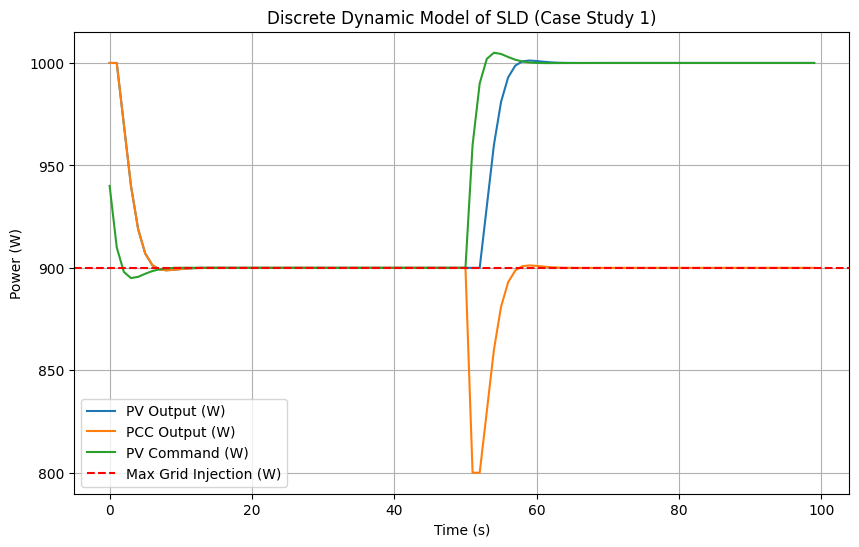

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class PIController:
    def __init__(self, kp, ki):
        self.kp = kp
        self.ki = ki
        self.integral = 0
        self.delta_t = 1

    def update_control_action(self, setpoint, measured_value):
        # Update integral term
        error = setpoint - measured_value
        print(error)
        self.integral += error*self.delta_t 
        # Return PI action
        return self.kp * error + self.ki * self.integral
    

    def set_kp(self, kp):
        self.kp = kp
    
    def set_ki(self, ki):
        self.ki = ki

    def reset(self):
        self.integral = 0

class Inverter:
    def __init__(self, nominal_power):
        self.pv_output_old = nominal_power
        self.pv_power = nominal_power
        self.alpha = 0.5
        self.delta_t = 1
    
    def set_dynamic_model(self, delta_t,tau):
        self.delta_t = delta_t
        self.alpha = delta_t / tau



    def simulate_sld_discrete(self, pv_cmd_k):
        """
        Simulates the discrete dynamic model for the simplified SLD.

        Parameters:
            time_steps (int): Number of time steps to simulate.
            delta_t (float): Sampling time (seconds).
            tau (float): Time constant of the PV inverter (seconds).
            pv_command (list): List of PV power commands over time (W).
            disturbance (list): List of disturbances at the PCC over time (W).

        Returns:
            tuple: Lists of PV power output and PCC power over time.
        """


        # Update PV power using discrete dynamic equation
        pv_next = (1 - self.alpha) * self.pv_output_old + self.alpha * pv_cmd_k

        # Calculate PCC power
        pv_output= self.pv_output_old
        self.pv_output_old= pv_next

        # Remove the initial state for plotting
        return pv_output



def calculate_max_pv_power(pcc_power, pv_power, max_grid_injection, nominal_pv_power):
    """
    Calculate the maximum active power command for the PV inverter.

    Parameters:
        pcc_power (float): Active power at the point of common coupling (W).
        pv_power (float): Active power production of the PV inverter (W).
        max_grid_injection (float): Maximum allowed active power injection into the grid (W).
        nominal_pv_power (float): Nominal power of the PV inverter (W).

    Returns:
        float: Maximum active power command for the PV inverter (W).
    """

    # Initialize PI controller
    pi_controller = PIController(0.5, 0.5, max_grid_injection)
    inverter_pv = Inverter(nominal_pv_power)
    # Initialize allowable PV power
    allowable_pv_power = nominal_pv_power

    if pv_power < nominal_pv_power:
        allowable_pv_power = min(nominal_pv_power, max_grid_injection)

    else:
        allowable_pv_power = allowable_pv_power + pi_controller.update_control_action(pcc_power)


    return allowable_pv_power


def simulate_case_study_1(max_grid_injection=1000, nominal_pv_power=1000, dt=1, steps=100):
    """
    Simulate PI control for Case Study 1.

    Parameters:
        pcc_power (float): Initial PCC power (W). 
        pv_output (float): Initial PV inverter power (W).
        max_grid_injection (float): Maximum allowed grid injection (W).
        nominal_pv_power (float): Nominal PV power (W).
        kp (float): Proportional gain for PI controller.
        ki (float): Integral gain for PI controller.
        dt (float): Time step for simulation (s).
        steps (int): Number of simulation steps.

    Returns:
        list: Time-series data of PCC power and PV commands.
    """

    # Initialize PI controller
    pi_controller = PIController(0.3, 0.3)
    inverter_pv = Inverter(nominal_pv_power)

    # Simulation parameters
    time_steps = steps
    disturbance = [0] * 50 + [-100] * 50  # Constant disturbance (W)

    # Initialize variables
    pv_output = [nominal_pv_power]  # Initial PV power output (W)
    pcc_output = [nominal_pv_power]  # PCC power output
    pv_command=[]


    for k in range(steps):
        print(max_grid_injection-pcc_output[-1])
        pv_command.append(nominal_pv_power+pi_controller.update_control_action(max_grid_injection,pcc_output[-1]))
        pv_output.append(inverter_pv.simulate_sld_discrete(pv_command[-1]))
        pcc_output.append(disturbance[k]+pv_output[-1])


    return pv_output, pcc_output,pv_command

# Simulation parameters
time_steps = 100
delta_t = 1.0  # Sampling time (s)
max_grid_injection=900

# Run the simulation
pv_output, pcc_output, pv_command = simulate_case_study_1(max_grid_injection=max_grid_injection)

# Plot results
time = np.arange(0, time_steps * delta_t, delta_t)
plt.figure(figsize=(10, 6))
plt.plot(time, pv_output[:-1], label="PV Output (W)")
plt.plot(time, pcc_output[:-1], label="PCC Output (W)")
plt.plot(time, pv_command[:], label="PV Command (W)")
plt.axhline(max_grid_injection, color="red", linestyle="--", label="Max Grid Injection (W)")
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.title("Discrete Dynamic Model of SLD (Case Study 1)")
plt.legend()
plt.grid()
plt.show()

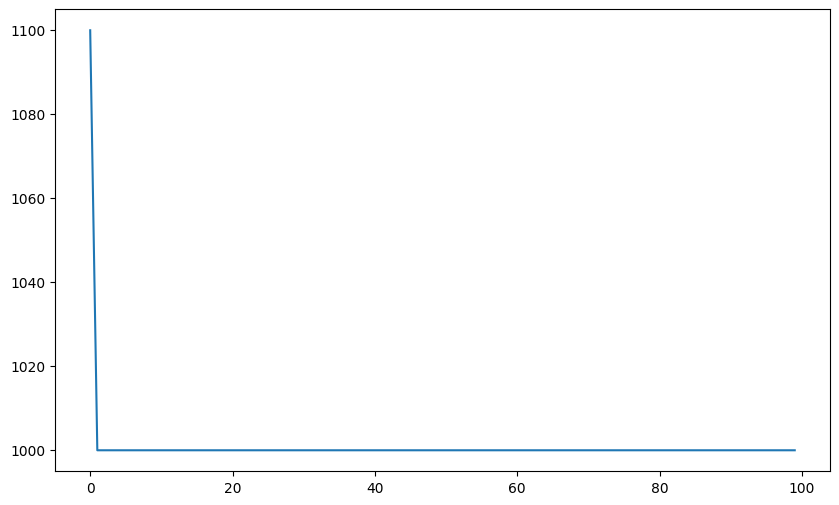

In [42]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

class PIController:
    def __init__(self, kp, ki, delta_t):
        self.kp = kp
        self.ki = ki
        self.delta_t = delta_t
        self.integral = 0
        self.feedforward=0

    def integral_action(self, setpoint, measured_value):
        # Update integral term
        error = setpoint - measured_value
        self.integral += error*self.delta_t 
        # Return PI action
        return self.kp * error + self.ki * self.integral


    def action_feedfoward(self, measured_disturbance):
        # Calculate feedforward
        action=self.feedforward
        # Update feedforward term
        disturbance = measured_disturbance
        self.feedforward=-(0.2 * disturbance + 0.2 * self.feedforward) 

        # Return Feedforward action
        return action 
    
    def reset_integral(self):
        self.integral = 0
    
    def reset_feedforward(self):
        self.feedforward = 0

class Inverter:
    def __init__(self, nominal_power,delta_t=1):
        self.pv_output_old = nominal_power
        self.pv_power = nominal_power
        self.alpha = 0.5
        self.delta_t = delta_t
    
    def set_dynamic_model(self, delta_t,tau=2):
        self.delta_t = delta_t
        self.alpha = delta_t / tau



    def simulate_sld_discrete(self, pv_cmd_k):
        """
        Simulates the discrete dynamic model for the simplified SLD.

        Parameters:
            time_steps (int): Number of time steps to simulate.
            delta_t (float): Sampling time (seconds).
            tau (float): Time constant of the PV inverter (seconds).
            pv_command (list): List of PV power commands over time (W).
            disturbance (list): List of disturbances at the PCC over time (W).

        Returns:
            tuple: Lists of PV power output and PCC power over time.
        """


        # Update PV power using discrete dynamic equation
        pv_next = (1 - self.alpha) * self.pv_output_old + self.alpha * pv_cmd_k

        # Calculate PCC power
        pv_output= self.pv_output_old
        self.pv_output_old= pv_next

        # Remove the initial state for plotting
        return pv_output



def calculate_max_pv_power(pcc_power, pv_power, max_grid_injection, nominal_pv_power):
    """
    Calculate the maximum active power command for the PV inverter.

    Parameters:
        pcc_power (float): Active power at the point of common coupling (W).
        pv_power (float): Active power production of the PV inverter (W).
        max_grid_injection (float): Maximum allowed active power injection into the grid (W).
        nominal_pv_power (float): Nominal power of the PV inverter (W).

    Returns:
        float: Maximum active power command for the PV inverter (W).
    """

    # Initialize PI controller
    pi_controller = PIController(0.5, 0.5, max_grid_injection)
    inverter_pv = Inverter(nominal_pv_power)
    # Initialize allowable PV power
    allowable_pv_power = nominal_pv_power

    if pv_power < nominal_pv_power:
        allowable_pv_power = min(nominal_pv_power, max_grid_injection)

    else:
        allowable_pv_power = allowable_pv_power + pi_controller.integral_action(pcc_power)


    return allowable_pv_power


step_amplitude=100*2
step_time=1
nominal_pv_power=1000
max_grid_injection=1000
dt=0.5
simulation_steps=100

# Initialize components
pi_controller = PIController(0.3, 0.3,0.5)
inverter_pv = Inverter(nominal_pv_power)
inverter_pv.set_dynamic_model(0.5)

# Simulation parameters
pv_output = [1100]  # Initial PV power output (W)
pcc_output = [nominal_pv_power]  # PCC power output
pv_command=[nominal_pv_power]

for k in range(simulation_steps):
    
    

    pv_command.append(nominal_pv_power+pi_controller.integral_action(max_grid_injection,pcc_output[-1]))
    pv_output.append(inverter_pv.simulate_sld_discrete(pv_command[-1]))
    pcc_output.append(pv_output[-1])


plt.figure(figsize=(10, 6))
plt.plot(pv_output[:-1], label="PV Output (W)")




